# Regression with more than one variable

As usual, we start by importing the libraries we will use:

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import pandas as pd

## The training data

We define some data we are going to use for training a model. They represent information about 30 persons. We know how many cigarets they were smoking per days, their bmi, their biological sex and the age they die .(NB: this is artificial data, not from a real study).

Note that for indicating categorical variables, such as the biological sex, we use a binary variable equal to 1 if the person belongs to a given category. We could have used a variable `is_female` instead of `is_male`. However, it is not useful to use both `is_male` and `is_female`, because there is a simple linear relation between both features.( `is_female = 1-is_male`)



In [23]:
daily_cig_smoked = np.array([24, 37, 11, 33, 27, 27,  6, 31, 28, 15, 33, 39, 39, 30, 26,  8, 10,
        0,  8, 33, 14, 32, 24, 10, 19, 13, 24, 38,  5,  0])

bmi = np.array([44.4, 47.7, 14.1, 49.3, 20.4, 38.2, 22.2, 17.1, 23.3, 31.4, 25.9,
       26. , 40.4, 31.8, 40.8, 49.8, 46.7, 24.8, 35.9, 20.5, 38.9, 14.4,
       29.6, 25.2, 39.4, 44.3, 47.2, 42.3, 30.8, 33.9])

is_male = np.array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0])

age_of_death = np.array([43.4, 25.2, 73.1, 25.5, 70.5, 52.1, 78.6, 64.6, 71.3, 66.8, 63.6,
       66.9, 42.6, 57.5, 48.6, 47.9, 46.6, 81.3, 75.6, 66.7, 58.4, 61.3,
       62.6, 81.8, 63.9, 57.4, 43.8, 38.6, 75.9, 81.4])

# We put all variables in one big array:
cig_bmi_male_age = np.vstack((daily_cig_smoked, bmi, is_male, age_of_death))


We try to plot our data visually, with `daily_cig_smoked` on one axis, `bmi` on the other and `age_of_death` on the vertical axis. the `is_male` feature is represented by a color code (blue if male, red if female)

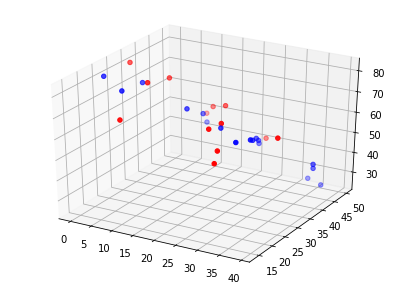

In [24]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
cmap, norm = matplotlib.colors.from_levels_and_colors([-1,0.5,2], ["red", "blue"])
ax.scatter3D(daily_cig_smoked, bmi, age_of_death, c=is_male, cmap=cmap, norm=norm)

We use the pandas library to display the example values nicely:

In [25]:
pd.DataFrame(cig_bmi_male_age.T,
             columns=("daily cigarets","bmi","is male","age of death"))


daily cigarets   bmi  is male  age of death
0             24.0  44.4      1.0          43.4
1             37.0  47.7      1.0          25.2
2             11.0  14.1      0.0          73.1
3             33.0  49.3      1.0          25.5
4             27.0  20.4      0.0          70.5
5             27.0  38.2      1.0          52.1
6              6.0  22.2      1.0          78.6
7             31.0  17.1      0.0          64.6
8             28.0  23.3      0.0          71.3
9             15.0  31.4      1.0          66.8
10            33.0  25.9      1.0          63.6
11            39.0  26.0      0.0          66.9
12            39.0  40.4      1.0          42.6
13            30.0  31.8      1.0          57.5
14            26.0  40.8      1.0          48.6
15             8.0  49.8      0.0          47.9
16            10.0  46.7      1.0          46.6
17             0.0  24.8      1.0          81.3
18             8.0  35.9      0.0          75.6
19            33.0  20.5      1.0          66.7
20            14.0  38.9      1.0          58.4
21            32.0  14.4      0.0          61.3
22            24.0  29.6      1.0          62.6
23            10.0  25.2      0.0          81.8
24            19.0  39.4      0.0          63.9
25            13.0  44.3      0.0          57.4
26            24.0  47.2      0.0          43.8
27            38.0  42.3      1.0          38.6
28             5.0  30.8      1.0          75.9
29             0.0  33.9      0.0          81.4

## Linear Regression with several features

We start by defining our model, with 4 parameters thetas::$$age = \theta_0 + \theta_1\times cig + \theta_2\times bmi + \theta_3\times ismale$$

In [26]:
def model(cig, bmi, is_male, thetas):
    return thetas[0] + thetas[1]*cig +thetas[2]*bmi + thetas[3]*is_male

As before, define the loss (ie. the Mean Squared Distance): $$ loss(\vec{\theta}) = \frac{1}{N}\cdot\sum_i (model(\vec{\theta}, x_i)-y_i)^2$$

In [27]:
def loss(thetas, cig, bmi, is_man, age_of_death):
    return np.mean((model(cig, bmi, is_man, thetas) - age_of_death)**2)
    

We can now define the gradient:
 $$error_i=\theta_0+ \theta_1 \times cig_i + \theta_2\times bmi + \theta_3\times ismale -age_i$$
and can then express the gradient as:
$$\frac{2}{N}\cdot\sum_i error_i$$ $$\frac{2}{N}\cdot\sum_i cig_i\times error_i$$

$$\frac{2}{N}\cdot\sum_i bmi_i\times error_i$$
$$\frac{2}{N}\cdot\sum_i ismale_i\times error_i$$

In [28]:
def grad_loss(thetas, cig, bmi, is_man, age_of_death):
    error = model(cig, bmi, is_male, thetas) - age_of_death
    return np.array([np.mean(2*error), np.mean(2*error*cig), 
                    np.mean(2*error*bmi), np.mean(2*error*is_male)])
                    

Next, we initialize some thetas randomly:

In [29]:
thetas = np.random.randn(4)

In [30]:
print ("The initial loss is:", loss(thetas, daily_cig_smoked, bmi, is_male, age_of_death))

The initial loss is: 11017.377846371875


We do the gradient descent. Note that we need many iterations to converge:

In [31]:
for numiter in range(20000):
    thetas = thetas - 0.0001*grad_loss(thetas, daily_cig_smoked, bmi, is_male, age_of_death)
print(f"loss: {loss(thetas, daily_cig_smoked, bmi, is_male, age_of_death)}")
print(thetas)
print(grad_loss(thetas, daily_cig_smoked, bmi, is_male, age_of_death))

loss: 538.3934957234998
[26.75507183  0.17691391  0.70696759 -0.58112459]
[-12.14398707   0.12593978   0.24732804   0.59143028]


Now, let us make a prediction:

In [32]:
print("If I smoke 10 cigarets per days, have a bmi of 22 and am a woman, the model predict I will die at",
      model(10, 22, 0, thetas))
      

If I smoke 10 cigarets per days, have a bmi of 22 and am a woman, the model predict I will die at 44.07749794793447


## Scaling the features

As we saw, having features with very different ranges will make learning slower. The following code will scale all features to have mean 0 and range between -1 and 1.

In [33]:
def scale_feature(feature):
    min_val = np.min(feature)
    max_val = np.max(feature)
    mean_feat = np.mean(feature)
    def scaler(x):
        return (x - mean_feat)/(max_val - min_val)
    return (feature - mean_feat)/(max_val - min_val), scaler

In [34]:
daily_cig_smoked_scaled, daily_cig_smoked_scaler= scale_feature(daily_cig_smoked)
bmi_scaled, bmi_scaler = scale_feature(bmi)
is_male_scaled, is_male_scaler = scale_feature(is_male)

The scaled data now looks like this:

In [35]:
pd.DataFrame(np.vstack(( daily_cig_smoked_scaled, bmi_scaled, is_male_scaled, age_of_death)).T,
             columns=("daily cigarets","bmi","is male","age of death"))

daily cigarets       bmi   is male  age of death
0         0.064957  0.313072  0.433333          43.4
1         0.398291  0.405509  0.433333          25.2
2        -0.268376 -0.535668 -0.566667          73.1
3         0.295726  0.450327  0.433333          25.5
4         0.141880 -0.359197 -0.566667          70.5
5         0.141880  0.139402  0.433333          52.1
6        -0.396581 -0.308777  0.433333          78.6
7         0.244444 -0.451634 -0.566667          64.6
8         0.167521 -0.277965 -0.566667          71.3
9        -0.165812 -0.051074  0.433333          66.8
10        0.295726 -0.205135  0.433333          63.6
11        0.449573 -0.202334 -0.566667          66.9
12        0.449573  0.201027  0.433333          42.6
13        0.218803 -0.039869  0.433333          57.5
14        0.116239  0.212232  0.433333          48.6
15       -0.345299  0.464332 -0.566667          47.9
16       -0.294017  0.377498  0.433333          46.6
17       -0.550427 -0.235948  0.433333          81.3
18       -0.345299  0.074977 -0.566667          75.6
19        0.295726 -0.356396  0.433333          66.7
20       -0.191453  0.159010  0.433333          58.4
21        0.270085 -0.527264 -0.566667          61.3
22        0.064957 -0.101494  0.433333          62.6
23       -0.294017 -0.224743 -0.566667          81.8
24       -0.063248  0.173016 -0.566667          63.9
25       -0.217094  0.310271 -0.566667          57.4
26        0.064957  0.391503 -0.566667          43.8
27        0.423932  0.254248  0.433333          38.6
28       -0.422222 -0.067880  0.433333          75.9
29       -0.550427  0.018954 -0.566667          81.4

Let us retry the learning. Note that we can now train with a much larger learning rate and thus minimize the loss much faster.

In [36]:
thetas = np.random.randn(4)

In [37]:
for numiter in range(100):
    thetas = thetas - 0.1*grad_loss(thetas, daily_cig_smoked_scaled, bmi_scaled, is_male_scaled, age_of_death)
print(f"loss: {loss(thetas, daily_cig_smoked_scaled, bmi_scaled, is_male_scaled, age_of_death)}")
print(thetas)
print(grad_loss(thetas, daily_cig_smoked_scaled, bmi_scaled, is_male_scaled, age_of_death))

loss: 41.23078114531556
[ 61.91832351 -23.8856882  -30.9775954   -3.81068738]
[-0.04879868  0.57692866  0.81834699  0.03568004]


In [38]:
print("If I smoke 10 cigarets per days, have a bmi of 22 and am a woman, the model predict I will die at", 
      model(daily_cig_smoked_scaler(10), bmi_scaler(22), is_male_scaler(1), thetas))

If I smoke 10 cigarets per days, have a bmi of 22 and am a woman, the model predict I will die at 77.02853437520389


## Learning more complex functions by features expansion

Let us go back to the case of one feature/variable. This time, we consider the relation between life expectancy and BMI.

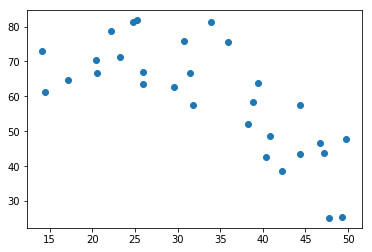

In [39]:
plt.plot(bmi, age_of_death, "o")

We can see that the relation is not really linear. Maybewe can use a Polynomial model instead of a linear model.Fortunately, we can re-use our multi-variable linear model by replacing the other features with powers of the bmi. 

In [69]:
thetas_bmi = np.random.randn(4)

We then do the gradient descent as before:

loss: 100.8671001908478
[ 71.06736163 -36.10414966 -67.93475001  -9.11634839]
[-0.03509597  0.00421002  0.2884107   0.01560304]


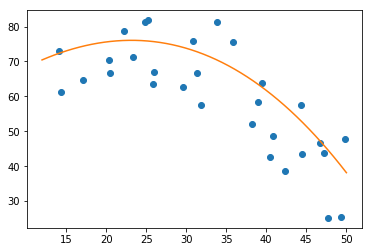

In [92]:
for numiter in range(50):
    thetas_bmi = thetas_bmi - 0.1*grad_loss(thetas_bmi, bmi_scaler(bmi),
                                                            bmi_scaler(bmi)**2, 
                      bmi_scaler(bmi)**3, age_of_death)
print(f"loss: {loss(thetas_bmi, bmi_scaler(bmi), bmi_scaler(bmi)**2, bmi_scaler(bmi)**3, age_of_death)}")
print(thetas_bmi)
print(grad_loss(thetas_bmi, bmi_scaler(bmi), bmi_scaler(bmi)**2, 
                       bmi_scaler(bmi)**3, age_of_death))

bmi_x = np.linspace(12, 50)
plt.plot(bmi, age_of_death, "o")
plt.plot(bmi_x, model(bmi_scaler(bmi_x), bmi_scaler(bmi_x)**2, 
                      bmi_scaler(bmi_x)**3, thetas_bmi))

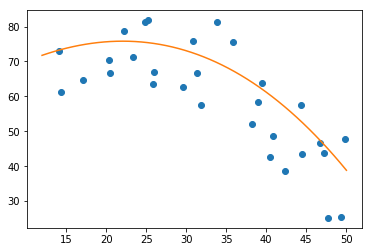

In [42]:
bmi_x = np.linspace(12, 50)
plt.plot(bmi, age_of_death, "o")
plt.plot(bmi_x, model(bmi_scaler(bmi_x), bmi_scaler(bmi_x)**2, 
                      bmi_scaler(bmi_x)**3, thetas_bmi))

We can see that the model predict the data much better than a simple linear regression  now.

In [1]:
import chainer

ModuleNotFoundError: No module named 'chainer'

In [3]:
import pytorch

ModuleNotFoundError: No module named 'pytorch'